# Deep Learning Project 1 - Logistic Regression Classification

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from time import time
from sklearn.metrics import accuracy_score

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

Import pre-processed image datasets from saved dictionary pickle file

   {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    'sanitized_train_dataset':sanitized_train_dataset,
    'sanitized_train_labels':sanitized_train_labels,
    'rand_sanit_dataset':rand_sanit_dataset,
    'rand_sanit_labels':rand_sanit_labels  
    }

In [3]:
# Change me to store data elsewhere
start = time()
data_root = '.'
#Define pickle file path
pickle_file = os.path.join(data_root, 'notMNIST.pickle')
#Establish dictionary for saved image datasets and labels
datasets_labels_dict={}
#Open pickle file to 'rb' read instruction
pickle_datasets_file = open(pickle_file,'rb')
#Recover dictionary of  image datasets and labels nparrays
datasets_labels_dict = pickle.load(pickle_datasets_file)
end = time()
print('Pickle file loaded in {:.4f} hours'.format((end-start)/3600.0))   

Pickle file loaded in 0.0218 hours


Visualize selected loaded datasets

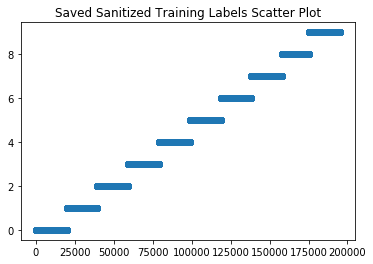

In [4]:
plt.title('Saved Sanitized Training Labels Scatter Plot')
plt.plot(np.arange(1,(len(datasets_labels_dict['sanitized_train_labels'])+1))\
         ,datasets_labels_dict['sanitized_train_labels'],"o")

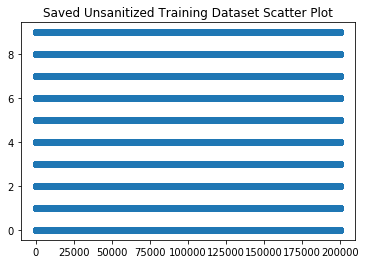

In [5]:
plt.title('Saved Unsanitized Training Dataset Scatter Plot')
plt.plot(np.arange(1,(len(datasets_labels_dict['train_labels'])+1))\
         ,datasets_labels_dict['train_labels'],"o")

Train a LogisticRegression model using 50, 100, 500, 1000, and 5000 training samples.  Evaluate training and validation accuracy scoring

In [17]:
"""
Unsanitized Training Dataset
"""
#Define training sample size list
training_sample_size_list = [50,100,500,1000,5000]
#Define inverse regularization parameter C
para_C = 1
#Establish modeling variable and model hyperparameters
log_regr_model = LogisticRegression(C=para_C, random_state=0)
#Define list of training images
training_image_list = []
#Define list of training labels
training_labels_list = []
#Define list of training images
valid_image_list = []
#Define list of training labels
valid_labels_list = []
#Establish accuracy list for plotting
unsanit_training_accuracy_list = []
unsanit_valid_accuracy_list = []
# Establish list of validation images (raveled 1D) and labels
for j in range(0,datasets_labels_dict['valid_dataset'].shape[0]):
    valid_image_list.append(np.ravel(datasets_labels_dict['valid_dataset'][j,0:28,0:28]))
    valid_labels_list.append(datasets_labels_dict['valid_labels'][j,])
#Initialize accuracy variables as floating points data types
training_accuracy = 0.0
valid_accuracy = 0.0
#Loop for training and validating modeling with each sample training sample size
for i in range(0,len(training_sample_size_list)):
    # Establish list of sample images (raved 1D) and labels
    start_list = time()
    for j in range(0,training_sample_size_list[i]):
        training_image_list.append(np.ravel(datasets_labels_dict['train_dataset'][j,0:28,0:28]))
        training_labels_list.append(datasets_labels_dict['train_labels'][j,])
    end_list = time()    
    print('{} training sample lists generated in {:.4f} hours'.format(training_sample_size_list[i],\
                                                                 (end_list-start_list)/3600.0))   
    #Capture time at modeling start
    start_model = time()
    log_regr_model.fit(training_image_list, training_labels_list)
    #Capture time at modeling end
    end_model = time()
    # Evaluate training accuracy
    training_accuracy = accuracy_score(log_regr_model.predict(training_image_list), training_labels_list)
    # Add accuracy value to list for plotting
    unsanit_training_accuracy_list.append(training_accuracy)
    # Evaluate validation accuracy
    valid_accuracy = accuracy_score(log_regr_model.predict(valid_image_list),valid_labels_list)
    # Add accuracy value to list for plotting
    unsanit_valid_accuracy_list.append(valid_accuracy)
    print('{} training samples modeled in {:.4f} hours'.format(training_sample_size_list[i],(end_model-start_model)/3600.0))
    print('Training accuracy is {:.4f}'.format(training_accuracy))
    print('Valid accuracy is {:.4f}'.format(valid_accuracy))
    
    
    

50 training sample lists generated in 0.0000 hours
50 training samples modeled in 0.0001 hours
Training accuracy is 1.0000
Valid accuracy is 0.4649
100 training sample lists generated in 0.0000 hours
100 training samples modeled in 0.0003 hours
Training accuracy is 1.0000
Valid accuracy is 0.6283
500 training sample lists generated in 0.0000 hours
500 training samples modeled in 0.0015 hours
Training accuracy is 1.0000
Valid accuracy is 0.7592
1000 training sample lists generated in 0.0000 hours
1000 training samples modeled in 0.0069 hours
Training accuracy is 0.9988
Valid accuracy is 0.7551
5000 training sample lists generated in 0.0000 hours
5000 training samples modeled in 0.0353 hours
Training accuracy is 0.9573
Valid accuracy is 0.7729


Text(0,0.5,'Accuracy Scoring')

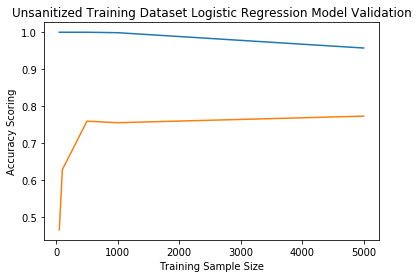

In [18]:
plt.plot(training_sample_size_list,unsanit_training_accuracy_list)
plt.plot(training_sample_size_list,unsanit_valid_accuracy_list)
plt.title('Unsanitized Training Dataset Logistic Regression Model Validation')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy Scoring')

In [13]:
"""
Sanitized Training Dataset.  Use validation dataset and label lists from Unsanitized training cell
"""
#Define training sample size list
training_sample_size_list = [50,100,500,1000,5000]
#Define inverse regularization parameter C
para_C = 1
#Establish modeling variable and model hyperparameters
log_regr_model = LogisticRegression(C=para_C, random_state=0)
#Define list of training images
training_image_list = []
#Define list of training labels
training_labels_list = []
#Initialize accuracy variables as floating points data types
training_accuracy = 0.0
valid_accuracy = 0.0
#Establish accuracy list for plotting
sanit_training_accuracy_list = []
sanit_valid_accuracy_list = []
#Loop for training and validating modeling with each sample training sample size
for i in range(0,len(training_sample_size_list)):
    # Establish list of sample images (raved 1D) and labels
    start_list = time()
    for j in range(0,training_sample_size_list[i]):
        training_image_list.append(np.ravel(datasets_labels_dict['rand_sanit_dataset'][j,0:28,0:28]))
        training_labels_list.append(datasets_labels_dict['rand_sanit_labels'][j,])
    end_list = time()    
    print('{} training sample lists generated in {:.4f} hours'.format(training_sample_size_list[i],\
                                                                 (end_list-start_list)/3600.0))   
    #Capture time at modeling start
    start_model = time()
    log_regr_model.fit(training_image_list, training_labels_list)
    #Capture time at modeling end
    end_model = time()
    # Evaluate training accuracy
    training_accuracy = accuracy_score(log_regr_model.predict(training_image_list), training_labels_list)
    # Add accuracy value to list for plotting
    sanit_training_accuracy_list.append(training_accuracy)
    # Evaluate validation accuracy
    valid_accuracy = accuracy_score(log_regr_model.predict(valid_image_list),valid_labels_list)
    # Add accuracy value to list for plotting
    sanit_valid_accuracy_list.append(valid_accuracy)
    print('{} training samples modeled in {:.4f} hours'.format(training_sample_size_list[i],(end_model-start_model)/3600.0))
    print('Training accuracy is {:.4f}'.format(training_accuracy))
    print('Valid accuracy is {:.4f}'.format(valid_accuracy))
    
    
    

50 training sample lists generated in 0.0000 hours
50 training samples modeled in 0.0003 hours
Training accuracy is 1.0000
Valid accuracy is 0.5831
100 training sample lists generated in 0.0000 hours
100 training samples modeled in 0.0006 hours
Training accuracy is 1.0000
Valid accuracy is 0.6849
500 training sample lists generated in 0.0000 hours
500 training samples modeled in 0.0018 hours
Training accuracy is 1.0000
Valid accuracy is 0.7461
1000 training sample lists generated in 0.0000 hours
1000 training samples modeled in 0.0061 hours
Training accuracy is 0.9988
Valid accuracy is 0.7478
5000 training sample lists generated in 0.0000 hours
5000 training samples modeled in 0.0395 hours
Training accuracy is 0.9465
Valid accuracy is 0.7682


Text(0,0.5,'Accuracy Scoring')

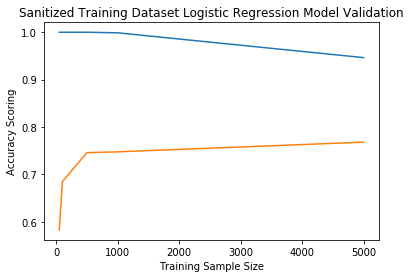

In [16]:
plt.plot(training_sample_size_list,sanit_training_accuracy_list)
plt.plot(training_sample_size_list,sanit_valid_accuracy_list)
plt.title('Sanitized Training Dataset Logistic Regression Model Validation')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy Scoring')